In [1]:
import numpy as np

In [3]:
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [4]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.9.0
alabaster                          0.7.12
altair                             4.1.0
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
appdirs                            1.4.4
argh                               0.26.2
asn1crypto                         1.3.0
astor                              0.8.0
astroid                            2.3.3
astropy                            4.0
astunparse                         1.6.3
atomicwrites                       1.3.0
attrs                              19.3.0
autopep8                           1.4.4
Babel                              2.8.0
backcall                           0.1.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.po

In [5]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
image_path = r"C:/Users/rusal/Desktop/blabla/solidWhiteCurve.jpg"

In [5]:
image1 = cv2.imread(image_path)

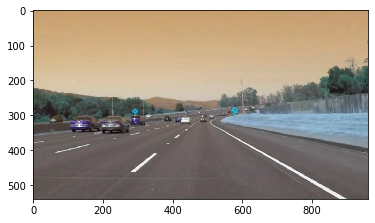

In [6]:
plt.imshow(image1)

In [7]:
def grey(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def gauss(image):
    return cv2.GaussianBlur(image, (5, 5), 0)
def canny(image):
    edges = cv2.Canny(image,50,150)
    return edges

In [8]:
def region(image):
    height, width = image.shape
    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

In [9]:
#lines = cv2.HoughLinesP(isolated, rho=2, theta=np.pi/180, threshold=100, np.array([]), minLineLength=40, maxLineGap=5)

In [10]:
def average(image, lines):
    left = []
    right = []
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
    
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line])

In [11]:
def make_points(image, average): 
 slope, y_int = average 
 y1 = image.shape[0]
 y2 = int(y1 * (3/5))
 x1 = int((y1 - y_int) // slope)
 x2 = int((y2 - y_int) // slope)
 return np.array([x1, y1, x2, y2])

In [15]:
def display_lines(image, lines):
 lines_image = np.zeros_like(image)
 if lines is not None:
   for line in lines:
     x1, y1, x2, y2 = line
     cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
 return lines_image

In [21]:
copy = np.copy(image1)
edges = cv2.Canny(copy,50,150)
isolated = region(edges)
cv2.imshow("edges", edges)
cv2.imshow("iso", isolated)
cv2.waitKey(0)


#DRAWING LINES: (order of params) --> region of interest, bin size (P, theta), min intersections needed, placeholder array, 
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average(copy, lines)
black_lines = display_lines(copy, averaged_lines)
#taking wighted sum of original image and lane lines image
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)
cv2.imshow("lanes", lanes)
cv2.waitKey(0)

[[609 384 878 539]]
[[660 407 899 539]]
[[293 462 353 412]]
[[289 453 346 410]]


-1